<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/CNN/exam/Category3_horses_or_humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import runtime
# runtime.unassign()

In [2]:
#Import google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%matplotlib inline
%config InlineBackend.fugure_format = 'retina'
def plot_loss_acc(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc      = history.history[     'accuracy' ]
  val_acc  = history.history[ 'val_accuracy' ]
  loss     = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  epochs   = range(len(acc)) # Get number of epochs
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     acc, label='Training accuracy' )
  plt.plot  ( epochs, val_acc, label='Validation accuracy' )
  plt.title ('Training and validation accuracy')
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     loss, label='Training loss' )
  plt.plot  ( epochs, val_loss, label='Validation loss' )
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title ('Training and validation loss'   )

last layer output shape:  (None, 17, 17, 768)
Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 1.3936 - accuracy: 0.9348
Epoch 1: val_accuracy improved from -inf to 0.98828, saving model to bestmodel.h5
33/33 [==============================] - 43s 939ms/step - loss: 1.3936 - accuracy: 0.9348 - val_loss: 0.3415 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.1662 - accuracy: 0.9844
Epoch 2: val_accuracy did not improve from 0.98828
33/33 [==============================] - 25s 777ms/step - loss: 0.1662 - accuracy: 0.9844 - val_loss: 4.4387 - val_accuracy: 0.8516 - lr: 0.0010
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9922
Epoch 3: val_accuracy did not improve from 0.98828
33/33 [==============================] - 25s 752ms/step - loss: 0.0840 - accuracy: 0.9922 - val_loss: 0.6797 - v

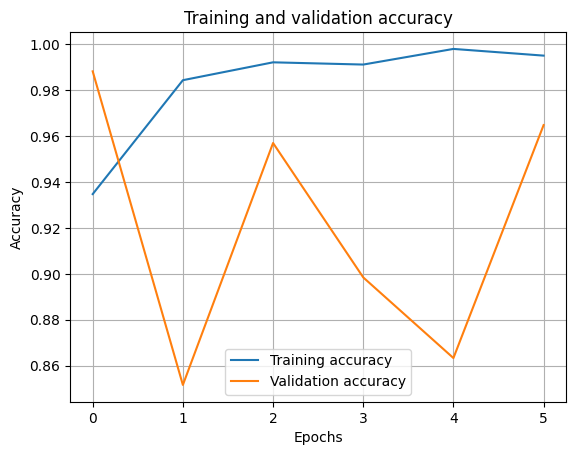

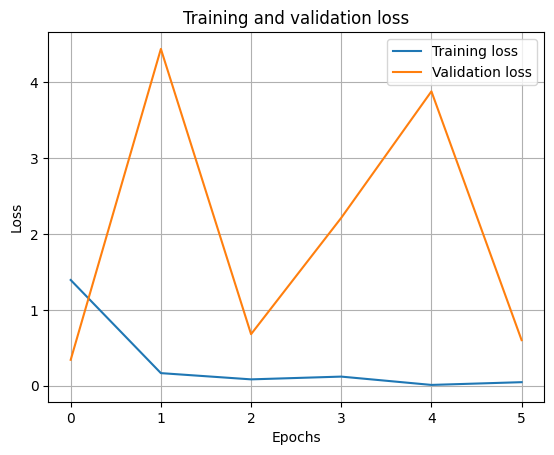

In [4]:
# ======================================================================
# There are 5 questions in this exam with increasing difficulty from 1-5.
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score significantly
# less than your Category 5 question.
#
# Don't use lambda layers in your model.
# You do not need them to solve the question.
# Lambda layers are not supported by the grading infrastructure.
#
# You must use the Submit and Test button to submit your model
# at least once in this category before you finally submit your exam,
# otherwise you will score zero for this category.
# ======================================================================
#
# Computer vision with CNNs
#
# Create and train a classifier for horses or humans using the provided data.
# Make sure your final layer is a 1 neuron, activated by sigmoid as shown.
#
# The test will use images that are 300x300 with 3 bytes color depth so be sure to
# design your neural network accordingly
import urllib
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
from tensorflow import keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

class myCallBack(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs['val_accuracy'] > 0.99):
      print("Cancelling training since accuracy reached 99%")
      self.model.stop_training=True

tf.keras.backend.clear_session()

filepath = 'https://storage.googleapis.com/tensorflow/keras-applications/inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
urllib.request.urlretrieve(filepath, './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


pre_trained_model = InceptionV3(input_shape=(300, 300, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False


last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# from keras import backend as K
# class AdamLearningRateTracker(keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     beta_1=0.9
#     beta_2=0.999
#     optimizer = self.model.optimizer
#     if optimizer.weight_decay>0:
#       lr = K.eval(optimizer.lr * (1. / (1. + optimizer.weight_decay * optimizer.iterations)))
#       t = K.cast(optimizer.iterations, K.floatx()) + 1
#       lr_t = lr * (K.sqrt(1. - K.pow(beta_2, t)) /(1. - K.pow(beta_1, t)))
#       print('\nLR: {:.6f}\n'.format(lr_t))

def solution_model():
    _TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
    _TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
    urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
    local_zip = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./tmp/horse-or-human/')
    zip_ref.close()
    urllib.request.urlretrieve(_TEST_URL, 'validation-horse-or-human.zip')
    local_zip = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./tmp/validation-horse-or-human/')
    zip_ref.close()

    train_datagen = ImageDataGenerator(
        #Your code here. Should at least have a rescale. Other parameters can help with overfitting.)
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    validation_datagen = ImageDataGenerator(rescale=1 / 255) #Your Code here

    train_generator = train_datagen.flow_from_directory(
        #Your Code Here
        './tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32, #64
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

    validation_generator = validation_datagen.flow_from_directory(
        #Your Code Here
        './tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


    # Note the input shape specified on your first layer must be (300,300,3)
    # Your Code here

    x = Flatten()(last_output)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    # This is the last layer. You should not change this code.
    x = Dense(1, activation='sigmoid')(x)

    model = Model(pre_trained_model.input, x)

    adam_optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, weight_decay=0.0)

    model.compile(loss='binary_crossentropy', #Your Code Here#
                  optimizer=adam_optimizer,
                  metrics=['accuracy'])

    #just clean the sessio, recomendable if we execute some times the model.
    keras.backend.clear_session()

    # This callback saves the best model based in val_accuracy
    callback = myCallBack()
    # bob = AdamLearningRateTracker()
    MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', mode='auto', save_best_only=True, save_weights_only=False, verbose=1)
    RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=7, verbose=1, mode="auto", min_lr=0.000000001, cooldown=5)
    ES = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=10, verbose=1) #min_delta=1e-4,


    history = model.fit( #Takes approx 17 epochs to reach 99% + val-accuracy
        train_generator,
        steps_per_epoch=33, #17
        epochs=100,
        verbose=1,
        validation_data=validation_generator,
        validation_steps=8,
        callbacks=[MCP, RLP, callback, ES]) #ES

    # #print model summary
    # model.summary()

    # Plot training results
    plot_loss_acc(history)

    # #model hyperparameters
    # best_hp = model.get_config()
    # print(best_hp.values)

    return model

    # NOTE: If training is taking a very long time, you should consider setting the batch size
    # appropriately on the generator, and the steps per epoch in the model.fit() function.


# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.
if __name__ == '__main__':
    model = solution_model()
    model.save("/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/exam/3/mymodel.h5")
    model.save("/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/Repository/Tensorflow_projects/Tensorflow_Code/CNN/exam/mymodel_Human_or_Horse_Tranfer_Learning_99_epoch.h5") #this should be tensorflow pycharm plugin

# Save Model

In [10]:
# model = solution_model()
model.save("/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/exam/3/mymodel.h5")
model.save("/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/Repository/Tensorflow_projects/Tensorflow_Code/CNN/exam/mymodel_Human_or_Horse_Tranfer_Learning_99_epoch.h5") #this should be tensorflow pycharm plugin

TypeError: 'module' object is not callable

In [9]:
!ls -lart "/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/exam/3/mymodel.h5"
!ls -lart "/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/Repository/Tensorflow_projects/Tensorflow_Code/CNN/exam/mymodel_Human_or_Horse_Tranfer_Learning_99_epoch.h5"

-rw------- 1 root root 2763952264 May  3 02:19 '/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/exam/3/mymodel.h5'
-rw------- 1 root root 2763952264 May  3 02:19 '/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/Repository/Tensorflow_projects/Tensorflow_Code/CNN/exam/mymodel_Human_or_Horse_Tranfer_Learning_99_epoch.h5'


In [11]:
# get file size in python
import os

file_name = "/content/gdrive/MyDrive/Data Science & Machine Learning/Tensorflow Certification/exam/3/mymodel.h5"

file_stats = os.stat(file_name)

print(file_stats)
print(f'File Size in Bytes is {file_stats.st_size}')
print(f'File Size in GB is {file_stats.st_size / (1024 * 1024 * 1024)}')

os.stat_result(st_mode=33152, st_ino=83, st_dev=49, st_nlink=1, st_uid=0, st_gid=0, st_size=2763952264, st_atime=1714702826, st_mtime=1714702742, st_ctime=1714702826)
File Size in Bytes is 2763952264
File Size in GB is 2.5741311386227608
